# DESAFIO PROPOSTO
#### identificar quais máquinas apresentam potencial de falha tendo como base dados extraídos através de sensores durante o processo de manufatura

### DICIONARIO DE DADOS

O conjunto de dados consiste em 10.000 pontos de dados armazenados como linhas com 8 características em colunas:

- **UID**: identificador exclusivo variando de 1 a 10000
- **product ID**: composto por uma letra L, M ou H para variantes de qualidade de produto baixa (50% de todos os produtos), média (30%) e alta (20%) e um número de série específico da variante
- **type**: apenas o tipo de produto L, M ou H da coluna 2
- **air temperature [K]**: gerada usando um processo de caminhada aleatória posteriormente normalizado para um desvio padrão de 2 K em torno de 300 K
- **process temperature [K]**: gerada usando um processo de caminhada aleatória normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10 K.
- **rotational speed [rpm]**: calculada a partir de uma potência de 2860 W, sobreposta com um ruído normalmente distribuído
- **torque [Nm]**: os valores de torque são normalmente distribuídos em torno de 40 Nm com um SD = 10 Nm e sem valores negativos.
- **tool wear (desgaste da ferramenta) [min]**: As variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta usada no processo. 

Um rótulo "failure_type" que indica se a máquina falhou neste ponto de dados específico para qualquer um dos seguintes modos de falha é verdadeiro. A falha da máquina consiste em cinco modos de falha independentes:
 - 1. **tool wear failure (TWF)**: a ferramenta será substituída ou falhará em um tempo de desgaste da ferramenta selecionado aleatoriamente entre 200 - 240 minutos (120 vezes em nosso conjunto de dados). Neste ponto no tempo, a ferramenta é substituída 69 vezes e falha 51 vezes (atribuídas aleatoriamente).

- 2. **heat dissipation failure (HDF)**: a dissipação de calor causa uma falha no processo, se a diferença entre a temperatura do ar e do processo for inferior a 8,6 K e a velocidade de rotação das ferramentas estiver abaixo de 1380 rpm. Este é o caso para 115 pontos de dados.

- 3. **power failure (PWF)**: o produto do torque e da velocidade de rotação (em rad/s) é igual à potência necessária para o processo. Se esta potência estiver abaixo de 3500 W ou acima de 9000 W, o processo falha, o que ocorre 95 vezes em nosso conjunto de dados.

- 4. **overstrain failure (OSF)**: se o produto do desgaste da ferramenta e do torque exceder 11.000 minNm para a variante do produto L (12.000 M, 13.000 H), o processo falha devido à sobrecarga. Isso é verdade para 98 pontos de dados.

- 5. **random failures (RNF)**: cada processo tem uma chance de 0,1% de falhar independentemente de seus parâmetros de processo. Isso ocorre apenas em 5 pontos de dados, menos do que o esperado para 10.000 pontos de dados em nosso conjunto de dados. Se pelo menos um dos modos de falha acima for verdadeiro, o processo falhará e o rótulo "falha da máquina" será definido como 1. Portanto, não é transparente para o método de aprendizado de máquina qual dos modos de falha causou a falha do processo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
sklearn.__version__

'1.0.2'

In [3]:
df_treino = pd.read_csv('desafio_manutencao_preditiva_treino.csv', sep=',')
df_treino.shape

(6667, 9)

In [4]:
df_treino

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


In [5]:
df_treino = df_treino.set_index('udi')
df_treino

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
udi,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...
9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure


# Analise preliminar

No Failure                  0.965202
Heat Dissipation Failure    0.011249
Power Failure               0.009450
Overstrain Failure          0.007800
Tool Wear Failure           0.004500
Random Failures             0.001800
Name: failure_type, dtype: float64

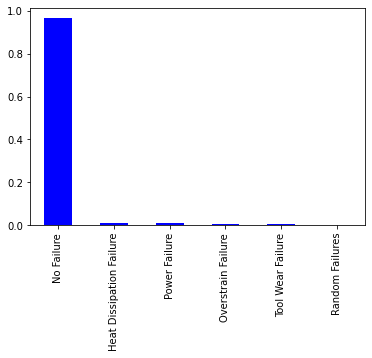

In [6]:
#distribuição de classes:
df_treino.failure_type.value_counts(dropna=False, normalize=True).plot(kind='bar',color = 'b')
df_treino.failure_type.value_counts(dropna=False, normalize=True)

É importante ficar atento á distribuição de classes. Perceba que se um modelo "chutar" as previsoes todas como "No Failure", ele terá 96,5% de acurácia.

Analisando a coluna *rotational_speed_rpm*:

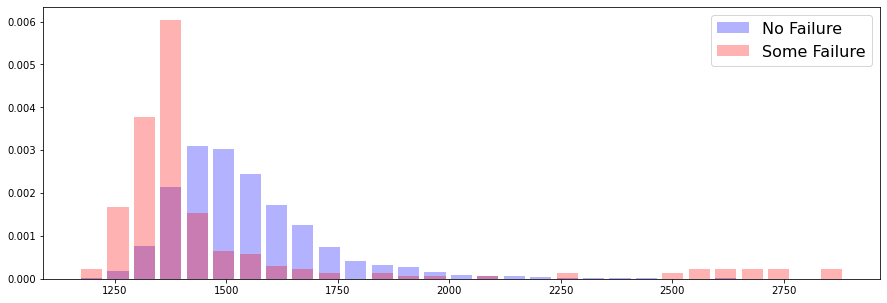

In [7]:
plt.figure(figsize=(15,5))

minimo = df_treino.rotational_speed_rpm.min()
maximo = df_treino.rotational_speed_rpm.max()
nbins=30
bins = np.linspace(minimo,maximo,nbins)

plt.hist(df_treino.loc[df_treino.failure_type=='No Failure'].rotational_speed_rpm, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='No Failure')
plt.hist(df_treino.loc[df_treino.failure_type!='No Failure'].rotational_speed_rpm, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='Some Failure')

plt.legend(fontsize=16)

analizando o atributo type:

In [8]:
cnt_0 = df_treino.loc[df_treino.failure_type=='No Failure'].type.value_counts(dropna=False)
cnt_1 = df_treino.loc[df_treino.failure_type!='No Failure'].type.value_counts(dropna=False)
aux = pd.concat([cnt_0.rename('No Failure'),cnt_1.rename('Some Failure')],axis=1)
aux = aux.div(aux.sum(axis='columns'),axis='rows')
aux

,No Failure,Some Failure
L,0.959970,0.040030
M,0.972823,0.027177
H,0.974164,0.025836


<AxesSubplot:>

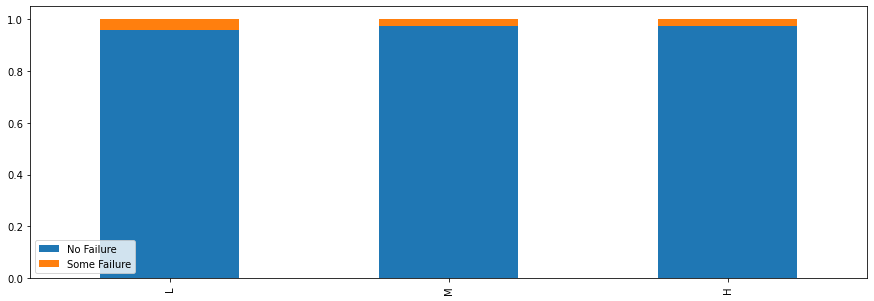

In [9]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True)

Para o type=L, temos aproximadamente 4,0% apresentando alguma falha.
Para o type=M, temos aproximadamente 2,72% apresentando alguma falha.
Para o type=H, temos aproximadamente 2,58 apresentando alguma falha.
Logo, as maquinas do type L, são mais propensas a apresentar falhas, que as demais, e as maquina do type M, são mais propensas a apresentar falhas que as do type H.

analizando a coluna *tool_wear_min*:

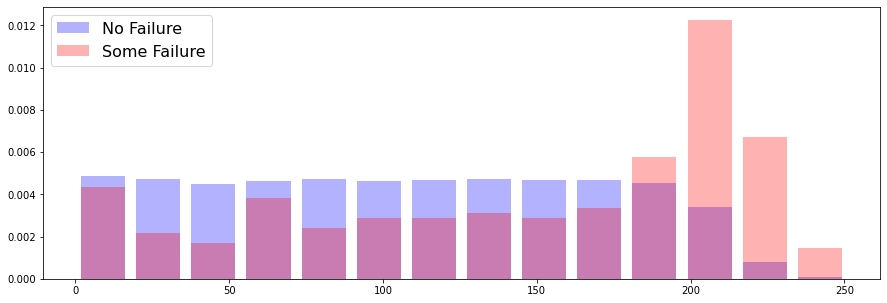

In [10]:
plt.figure(figsize=(15,5))

minimo = df_treino.tool_wear_min.min()
maximo = df_treino.tool_wear_min.max()
nbins=15
bins = np.linspace(minimo,maximo,nbins)

plt.hist(df_treino.loc[df_treino.failure_type=='No Failure'].tool_wear_min, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='No Failure')
plt.hist(df_treino.loc[df_treino.failure_type!='No Failure'].tool_wear_min, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='Some Failure')

plt.legend(fontsize=16)

maquinas com tool_wear_min >=200 possui grandes chances de apresentar falhas  

analisando a coluna *torque_nm*:

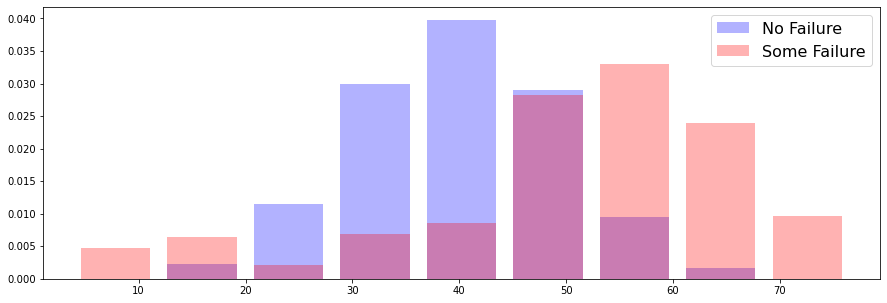

In [11]:
plt.figure(figsize=(15,5))

minimo = df_treino.torque_nm.min()
maximo = df_treino.torque_nm.max()
nbins=10
bins = np.linspace(minimo,maximo,nbins)

plt.hist(df_treino.loc[df_treino.failure_type=='No Failure'].torque_nm, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='No Failure')
plt.hist(df_treino.loc[df_treino.failure_type!='No Failure'].torque_nm, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='Some Failure')

plt.legend(fontsize=16)

Torque normal: media=40Nm e desvio padrao=10Nm.
Vemos que maquinas com torque<=20Nm ou torque>55Nm costumam dar problemas. 

### Analisando os tipos de falha

In [12]:
df_treino.loc[df_treino.failure_type!='No Failure'].failure_type.value_counts(dropna=False,normalize=True)

Heat Dissipation Failure    0.323276
Power Failure               0.271552
Overstrain Failure          0.224138
Tool Wear Failure           0.129310
Random Failures             0.051724
Name: failure_type, dtype: float64

<AxesSubplot:>

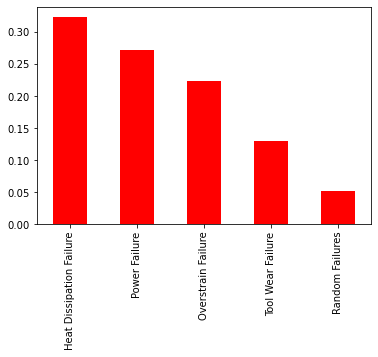

In [13]:
df_treino.loc[df_treino.failure_type!='No Failure'].failure_type.value_counts(dropna=False,normalize=True).plot(kind='bar',color='r')

falhas do tipo Heat Dissipation Failure e Power Failure somam aproximadamente 60% das falhas. Vamos olhar com mais cuidado para essas falhas:

In [14]:
aux = df_treino.loc[(abs(df_treino.air_temperature_k - df_treino.process_temperature_k)<8.6)
]

aux.loc[(aux.rotational_speed_rpm<1380)].failure_type.value_counts(dropna=False)

Heat Dissipation Failure    75
Power Failure                2
Name: failure_type, dtype: int64

<AxesSubplot:>

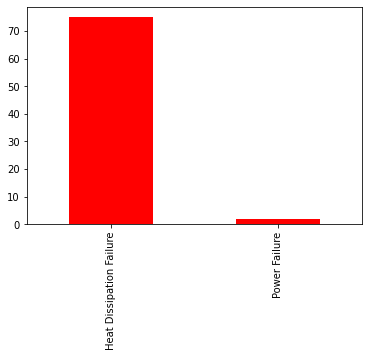

In [15]:
aux.loc[(aux.rotational_speed_rpm<1380)].failure_type.value_counts(dropna=False).plot(kind='bar',color='r')

todas as falhas do tipo Heat Dissipation Failure estao relacionadas com a diferença entre (process_temperature_k e air_temperature_k) < 8,6k e rotational_speed_rpm < 1380rmp.

Aproximadamente 60% das falhas estao relacionadas com a diferença de temperatura entre (process_temperature_k e air_temperature_k) < 8,6k. Que tal substituirmos as colunas process_temperature_k e air_temperature_k, por uma coluna temp_difference<8,6k? Isso pode deixar uma informação valiosa mais visivel para os metodos de machine learning na hora de prever  os dados. Vamos tambem substituir a coluna rotational_speed_rpm pela coluna rotational_speed_rpm<1380rmp, podendo esta valer apenas 0 ou 1.
Vamos fazer isso:

In [16]:
df_treino2 = df_treino.copy()
df_treino2.loc[:,'temp_difference<8.6k'] = abs(df_treino2.air_temperature_k - df_treino2.process_temperature_k)
df_treino2 = df_treino2.drop(['air_temperature_k','process_temperature_k'],axis=1)


def auxiliar(x):
    if x<8.6:
        return 1
    else:
        return 0

df_treino2['temp_difference<8.6k'] = df_treino2['temp_difference<8.6k'].apply(auxiliar)
df_treino2

,product_id,type,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k
udi,,,,,,,
1,M14860,M,1551,42.8,0,No Failure,0
2,L47181,L,1408,46.3,3,No Failure,0
5,L47184,L,1408,40.0,9,No Failure,0
6,M14865,M,1425,41.9,11,No Failure,0
7,L47186,L,1558,42.4,14,No Failure,0
...,...,...,...,...,...,...,...
9995,L57174,L,1634,27.9,12,No Failure,0
9996,M24855,M,1604,29.5,14,No Failure,0
9997,H39410,H,1632,31.8,17,No Failure,0


In [17]:
def auxiliar(x):
    if x<1380:
        return 1
    else:
        return 0

df_treino2['rotational_speed_rpm'] = df_treino2['rotational_speed_rpm'].apply(auxiliar)
df_treino2 = df_treino2.rename(columns={"rotational_speed_rpm":"rotational_speed_rpm<1380rmp"})
df_treino2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k
udi,,,,,,,
1,M14860,M,0,42.8,0,No Failure,0
2,L47181,L,0,46.3,3,No Failure,0
5,L47184,L,0,40.0,9,No Failure,0
6,M14865,M,0,41.9,11,No Failure,0
7,L47186,L,0,42.4,14,No Failure,0
...,...,...,...,...,...,...,...
9995,L57174,L,0,27.9,12,No Failure,0
9996,M24855,M,0,29.5,14,No Failure,0
9997,H39410,H,0,31.8,17,No Failure,0


Uma vantagem bônus de fazer esse tipo de mudança na base de dados, é a eliminação de outliers, isso porque, como os valores foram categorizados (neste caso,rotational_speed_rpm<1380rmp e temp_difference<8.6k ou vale zero, ou vale um), logo não há outliers nessas colunas.

Agora olhando para o tipo de **falha PWF**, sabemos pelo dicionario de dados que esta falha ocorre quando o produto do:

*torque x rotational speed(rad/s)<3500W* ou 
*torque x rotational speed(rad/s)>9000W*.

Vamos observar se isso realmente acontece. Para isso, precisaremos antes converter *rotational_speed* de *rpm* para *rad/s* atravez da formula:
**1 rpm = 0,10471975511965977 rad/s**


In [18]:
df_treino2.loc[:,'3500W<torquexrot_speed<9000W'] = (df_treino.torque_nm * df_treino.rotational_speed_rpm *0.10471975511965977) 

def auxiliar(x):
    if (x<3500 or x>9000):
        return 1
    else:
        return 0

df_treino2['3500W<torquexrot_speed<9000W'] = df_treino2['3500W<torquexrot_speed<9000W'].apply(auxiliar)
df_treino2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k,3500W<torquexrot_speed<9000W
udi,,,,,,,,
1,M14860,M,0,42.8,0,No Failure,0,0
2,L47181,L,0,46.3,3,No Failure,0,0
5,L47184,L,0,40.0,9,No Failure,0,0
6,M14865,M,0,41.9,11,No Failure,0,0
7,L47186,L,0,42.4,14,No Failure,0,0
...,...,...,...,...,...,...,...,...
9995,L57174,L,0,27.9,12,No Failure,0,0
9996,M24855,M,0,29.5,14,No Failure,0,0
9997,H39410,H,0,31.8,17,No Failure,0,0


In [19]:
df_treino2['3500W<torquexrot_speed<9000W'].value_counts(dropna=False,normalize=False)

0    6604
1      63
Name: 3500W<torquexrot_speed<9000W, dtype: int64

In [20]:
aux = df_treino2.loc[(df_treino2['3500W<torquexrot_speed<9000W'] == 1)].failure_type.value_counts(dropna=False,normalize=False)
aux

Power Failure    63
Name: failure_type, dtype: int64

perceba que os 63 individuos que tem o *torquexrot_speed* fora do intervalo [3500W, 9000W], sao os mesmos exatos 63 individuos que apresentam a falha do tipo *Power Failure*. Logo, ter essa coluna no dataframe, é valioso para os modelos de machine learning preverem essa falha especifica! 

A terceira maior ocorrencia de falha nas maquina, é do tipo *Overstrain Failure*,comportando 22,4138% das falhas totais, dentro da base de dados para treino. 
Dando uma olhada no dicionario de dados, descobrimos que esse tipo de falha ocorre quando o produto entre *torque_nm x tool_wear_min>x*, sendo x:
    11000 para type L,
    12000 para type M,
    13000 para type H.
Vamos criar uma coluna *torque_nm x tool_wear_min* e investigar:


In [21]:
df_treino2.loc[:,'torque_nm_x_tool_wear_min'] = (df_treino.torque_nm * df_treino.tool_wear_min)
#df_treino2 = df_treino2.drop('tool_wear_min',axis=1)
df_treino2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k,3500W<torquexrot_speed<9000W,torque_nm_x_tool_wear_min
udi,,,,,,,,,
1,M14860,M,0,42.8,0,No Failure,0,0,0.0
2,L47181,L,0,46.3,3,No Failure,0,0,138.9
5,L47184,L,0,40.0,9,No Failure,0,0,360.0
6,M14865,M,0,41.9,11,No Failure,0,0,460.9
7,L47186,L,0,42.4,14,No Failure,0,0,593.6
...,...,...,...,...,...,...,...,...,...
9995,L57174,L,0,27.9,12,No Failure,0,0,334.8
9996,M24855,M,0,29.5,14,No Failure,0,0,413.0
9997,H39410,H,0,31.8,17,No Failure,0,0,540.6


In [22]:
aux = df_treino2.copy()
aux = aux.drop(['product_id','rotational_speed_rpm<1380rmp','torque_nm','temp_difference<8.6k','3500W<torquexrot_speed<9000W'],axis=1)
aux

,type,tool_wear_min,failure_type,torque_nm_x_tool_wear_min
udi,,,,
1,M,0,No Failure,0.0
2,L,3,No Failure,138.9
5,L,9,No Failure,360.0
6,M,11,No Failure,460.9
7,L,14,No Failure,593.6
...,...,...,...,...
9995,L,12,No Failure,334.8
9996,M,14,No Failure,413.0
9997,H,17,No Failure,540.6


Overstrain Failure          50
Power Failure                5
Heat Dissipation Failure     4
Name: failure_type, dtype: int64


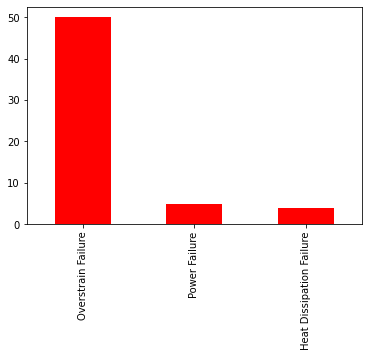

In [23]:
aux2 = aux.loc[aux.type=='L']
aux2 = aux2.loc[(aux2['torque_nm_x_tool_wear_min']>11000)].failure_type.value_counts(dropna=False,normalize=False)
aux2.plot(kind='bar',color='r')
print(aux2)


Power Failure         3
Overstrain Failure    1
Name: failure_type, dtype: int64


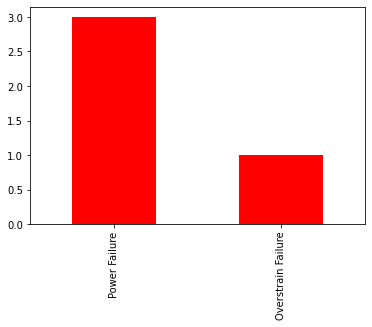

In [24]:
aux2 = aux.loc[aux.type=='M']
aux2 = aux2.loc[(aux2['torque_nm_x_tool_wear_min']>12000)].failure_type.value_counts(dropna=False,normalize=False)
aux2.plot(kind='bar',color='r')
print(aux2)

Overstrain Failure    1
Power Failure         1
Name: failure_type, dtype: int64


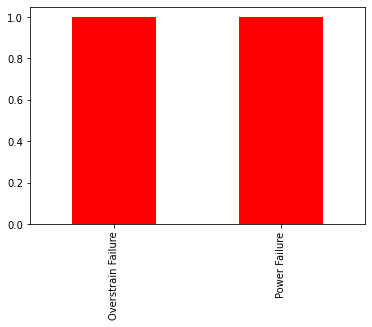

In [25]:
aux2 = aux.loc[aux.type=='H']
aux2 = aux2.loc[(aux2['torque_nm_x_tool_wear_min']>13000)].failure_type.value_counts(dropna=False,normalize=False)
aux2.plot(kind='bar',color='r')
print(aux2)

Olhando os gráficos, fica claro que todas as maquinas fora dos parâmetros indicados no dicionario de dados, estão de fato, apresentando defeito. Arrisco dizer ainda, que algumas máquinas tem mais de um tipo de defeito, pois, apesar de estarem dentro dos paramentros de defeito do *overstrain failure*, foram identificadas com outros defeitos. Este é o caso para 9 maquinas do tipo L, 3 maquinas do tipo M, e 1 maquina do tipo H.

Faz sentido haver maquinas com  Overstrain Failure e Power Failure ao mesmo tempo, pois ambas estão relacionadas com o Torque.

E se criarmos a partir das colunas *torque_nm_x_tool_wear_min* e *type*, outras 3 colunas:
    <p> *t_x_t>11_&_L* -> representa as maquinas em que *torque_nm_x_tool_wear_min>11000* e *type=L*</p>
   <p> *t_x_t>12_&_M* -> representa as maquinas em que *torque_nm_x_tool_wear_min>12000* e *type=M*</p>
    <p> *t_x_t>13_&_H* -> representa as maquinas em que *torque_nm_x_tool_wear_min>13000* e *type=H*</p>
    
Acredito que isso ajudaria o modelo de machine learning escolhido a identificar mais facilmente, falhas do tipo 
*Overstrain Failure*. Vamos tambem dropar a coluna *torque_nm_x_tool_wear_min* apos a criação das colunas citadas acima.

Vamos fazer isso:
    



In [26]:
#df_treino2 = df_treino2.drop('tool_wear_min',axis=1)
df_treino2.loc[(df_treino2.type == 'L') & (df_treino2.torque_nm_x_tool_wear_min > 11000),'t_x_t>11_&_L'] = 1 
df_treino2.loc[(df_treino2.type == 'M') & (df_treino2.torque_nm_x_tool_wear_min > 12000),'t_x_t>12_&_M'] = 1 
df_treino2.loc[(df_treino2.type == 'H') & (df_treino2.torque_nm_x_tool_wear_min > 13000),'t_x_t>13_&_H'] = 1 

df_treino2['t_x_t>11_&_L'].fillna(0, inplace=True);
df_treino2['t_x_t>12_&_M'].fillna(0, inplace=True);
df_treino2['t_x_t>13_&_H'].fillna(0, inplace=True);

df_treino2 = df_treino2.drop(['torque_nm_x_tool_wear_min'],axis=1)

In [27]:
df_treino2['t_x_t>11_&_L'].value_counts(dropna = False)

0.0    6608
1.0      59
Name: t_x_t>11_&_L, dtype: int64

In [28]:
df_treino2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
udi,,,,,,,,,,,
1,M14860,M,0,42.8,0,No Failure,0,0,0.0,0.0,0.0
2,L47181,L,0,46.3,3,No Failure,0,0,0.0,0.0,0.0
5,L47184,L,0,40.0,9,No Failure,0,0,0.0,0.0,0.0
6,M14865,M,0,41.9,11,No Failure,0,0,0.0,0.0,0.0
7,L47186,L,0,42.4,14,No Failure,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,L57174,L,0,27.9,12,No Failure,0,0,0.0,0.0,0.0
9996,M24855,M,0,29.5,14,No Failure,0,0,0.0,0.0,0.0
9997,H39410,H,0,31.8,17,No Failure,0,0,0.0,0.0,0.0


Por ultimo, vamos analisar as falhas do tipo *random failures*. Esse tipo de falha, será a mais dificil de identificar, pois como o nome já diz, são falhas aleatórias, e pode ocorrer com qualquer maquina.

In [29]:
aux = df_treino2.loc[df_treino2.failure_type=='Random Failures']
aux

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
udi,,,,,,,,,,,
1222,M16081,M,0,46.4,132,Random Failures,0,0,0.0,0.0,0.0
1749,H31162,H,0,31.1,166,Random Failures,0,0,0.0,0.0,0.0
2073,L49252,L,0,35.5,189,Random Failures,0,0,0.0,0.0,0.0
2560,L49739,L,0,50.4,140,Random Failures,0,0,0.0,0.0,0.0
3453,H32866,H,0,32.3,2,Random Failures,0,0,0.0,0.0,0.0
5472,L52651,L,1,61.2,170,Random Failures,0,0,0.0,0.0,0.0
5490,L52669,L,0,35.0,215,Random Failures,0,0,0.0,0.0,0.0
5496,H34909,H,1,55.0,12,Random Failures,0,0,0.0,0.0,0.0
5640,L52819,L,0,28.7,180,Random Failures,0,0,0.0,0.0,0.0


Por hora, não consigo pensar em nada. Vamos seguir assim, e se o modelo não ficar bom, tentamos voltar aqui.

# Correlação de variaveis

Variaveis com alto indice de correlação, atrapalham bastante o desempenho de varios modelos.

,rotational_speed_rpm<1380rmp,torque_nm,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
rotational_speed_rpm<1380rmp,1.000000,0.545013,0.017722,0.100006,0.156887,0.043386,0.018135
torque_nm,0.545013,1.000000,-0.008945,0.108198,0.164620,0.069297,0.033934
temp_difference<8.6k,0.017722,-0.008945,1.000000,0.002784,-0.001535,-0.006825,-0.004825
3500W<torquexrot_speed<9000W,0.100006,0.108198,0.002784,1.000000,0.073540,0.187545,0.087833
t_x_t>11_&_L,0.156887,0.164620,-0.001535,0.073540,1.000000,-0.002315,-0.001637
t_x_t>12_&_M,0.043386,0.069297,-0.006825,0.187545,-0.002315,1.000000,-0.000424
t_x_t>13_&_H,0.018135,0.033934,-0.004825,0.087833,-0.001637,-0.000424,1.000000


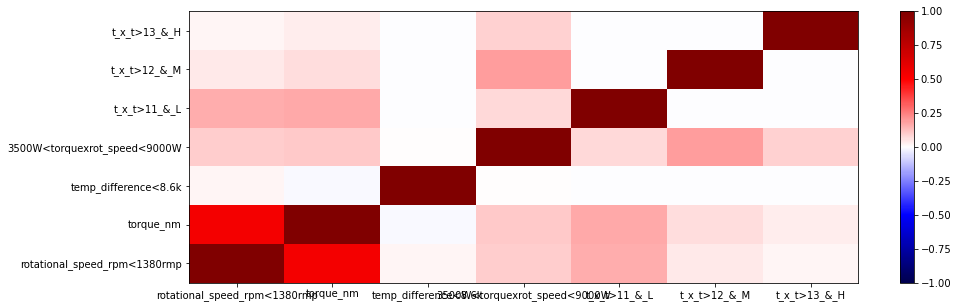

In [30]:
df_num = df_treino2[[
    'rotational_speed_rpm<1380rmp', 
    'torque_nm', 
    'temp_difference<8.6k', 
    '3500W<torquexrot_speed<9000W',
    't_x_t>11_&_L', 
    't_x_t>12_&_M',
    't_x_t>13_&_H',
]]

corr_num = df_num.corr(method='pearson')

plt.figure(figsize=(15,5))
plt.pcolormesh(corr_num.index, corr_num.columns, corr_num, vmin=-1, vmax=1, shading='nearest', cmap='seismic')
plt.colorbar()

corr_num

Dentre as variaveis numericas, a maior correlação encontrada, é *torque_nm* com *rotational_speed_rpm<1380rpm*. 
Como essa correlação nem é tão alta assim, vamos manter ambas colunas e seguir.

Já dentre as variaveis categóricas, claramente *product_id* e *type* tem alta correlaçao, portanto, daqui em diante, seguirei apenas com a coluna *type*


In [31]:
df_treino2 = df_treino2.drop('product_id',axis=1)
df_treino2

,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,failure_type,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
udi,,,,,,,,,,
1,M,0,42.8,0,No Failure,0,0,0.0,0.0,0.0
2,L,0,46.3,3,No Failure,0,0,0.0,0.0,0.0
5,L,0,40.0,9,No Failure,0,0,0.0,0.0,0.0
6,M,0,41.9,11,No Failure,0,0,0.0,0.0,0.0
7,L,0,42.4,14,No Failure,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,L,0,27.9,12,No Failure,0,0,0.0,0.0,0.0
9996,M,0,29.5,14,No Failure,0,0,0.0,0.0,0.0
9997,H,0,31.8,17,No Failure,0,0,0.0,0.0,0.0


# Modelagem

Para o modelagem optei por iniciar os testes com o modelo Naive Bayes, e posteriormente, testarei regressão logistica e 
arvore de decisão. O que obter a melhor metrica de avalição será o escolhido.
A metrica de avaliação escolhida para avaliar os modelos, é a recall, tambem conhecida como sensibilidade. Essa métrica é ideal para este problema, pois ela é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos ( no caso, identificações corretas de falhas) e o total de exemplos classificados como positivos.

In [32]:
df_treino.isnull().sum()
#não há dados faltantes

product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

In [33]:
df_treino2.describe()

,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,0.138443,40.058512,108.098095,0.071996,0.009450,0.008850,0.000600,0.000300
std,0.345390,9.950804,63.359915,0.258501,0.096756,0.093662,0.024489,0.017319
min,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.200000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.200000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,76.600000,251.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df_treino3 = df_treino2.drop('torque_nm', axis=1)

def auxiliar(x):
    if x == 'L':
        return 0
    elif x == 'M':
        return 1
    elif x == 'H':
        return 2
df_treino3['type'] = df_treino2['type'].apply(auxiliar)
df_treino3


,type,rotational_speed_rpm<1380rmp,tool_wear_min,failure_type,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
udi,,,,,,,,,
1,1,0,0,No Failure,0,0,0.0,0.0,0.0
2,0,0,3,No Failure,0,0,0.0,0.0,0.0
5,0,0,9,No Failure,0,0,0.0,0.0,0.0
6,1,0,11,No Failure,0,0,0.0,0.0,0.0
7,0,0,14,No Failure,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,0,0,12,No Failure,0,0,0.0,0.0,0.0
9996,1,0,14,No Failure,0,0,0.0,0.0,0.0
9997,2,0,17,No Failure,0,0,0.0,0.0,0.0


In [35]:
from sklearn.model_selection import train_test_split

X = df_treino3.drop('failure_type',axis=1)
y = df_treino3.failure_type
X_tr, X_val, y_tr, y_val = train_test_split(X,y, test_size=.3, random_state=5487)

## Tratamento de outliers e padronização



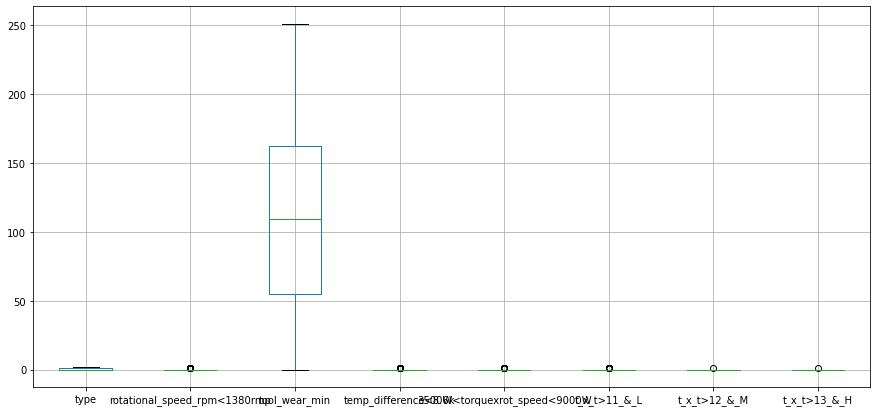

In [36]:
X_tr.boxplot(figsize=(15,7))
plt.show()

Uma das maneiras mais simples de tratar outliers é remover aqueles valores que são menores que  Q1−1.5∗IQR  ou maiores que  Q3+1.5∗IQR , onde  Q1  é o primeiro quartil,  Q3  é o terceiro quartil e  IQR  é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação:  IQR=Q3−Q1. Vamo fazer isso:

322.5


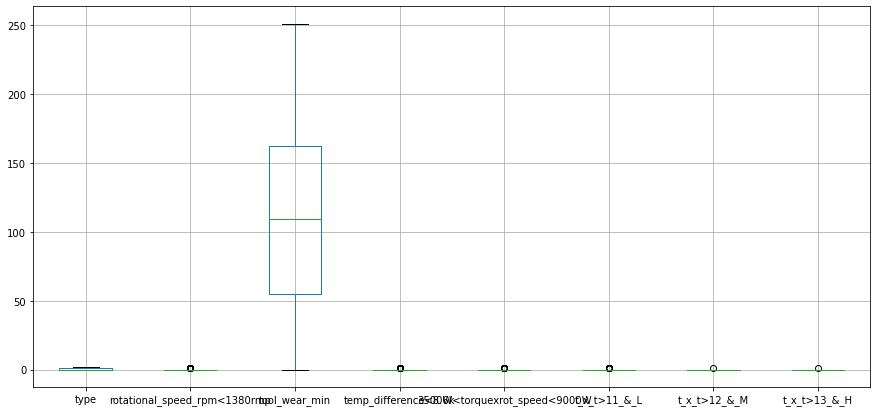

In [37]:
q3 = X_tr['tool_wear_min'].quantile(0.75)
q1 = X_tr['tool_wear_min'].quantile(0.25) 
iqr = q3 - q1
teto = q3+(1.5*iqr)
piso = q1-(1.5*iqr)
print(teto)
X_tr.loc[X_tr['tool_wear_min'] > teto, 'tool_wear_min'] = teto
X_val.loc[X_val['tool_wear_min'] > teto, 'tool_wear_min'] = teto
X_tr.loc[X_tr['tool_wear_min'] < piso, 'tool_wear_min'] = piso
X_val.loc[X_val['tool_wear_min'] < piso, 'tool_wear_min'] = piso
X_tr.boxplot(figsize=(15,7))
plt.show()

desde o inicio, parece que nao havia outliers, mas valeu a demosntração :)


In [38]:
#simples padronização:
q3 = X_tr['tool_wear_min'].quantile(0.75)

def auxiliar(x):
    return x/q3
   

X_tr['tool_wear_min'] = X_tr['tool_wear_min'].apply(auxiliar)
X_val['tool_wear_min'] = X_val['tool_wear_min'].apply(auxiliar)
X_tr.describe()


,type,rotational_speed_rpm<1380rmp,tool_wear_min,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
count,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000
mean,0.497214,0.137591,0.671962,0.072225,0.008358,0.007287,0.000214,0.000214
std,0.670375,0.344507,0.390693,0.258887,0.091051,0.085060,0.014640,0.014640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339506,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.672840,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.549383,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
from sklearn.preprocessing import LabelEncoder

enc2 = LabelEncoder()
y_tr2 = enc2.fit_transform(y_tr)
y_val2 = enc2.transform(y_val)
classes = enc2.classes_
classes



array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [40]:
from sklearn.naive_bayes import CategoricalNB

In [41]:
cnb2 = CategoricalNB(alpha=0.01)
cnb2.fit(X_tr,y_tr2)


CategoricalNB(alpha=0.01)

In [42]:
y_pred = cnb2.predict_proba(X_val)
y_pred.shape, classes

y_tr2_m, y_val2_m = y_tr2, y_val2 #usando posteiormente para testar o desempenho multiclasse da arvore de decisao.

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_val2, y_pred.argmax(axis=1),normalize=True)
precision = precision_score(y_val2, y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_val2, y_pred.argmax(axis=1), average='macro')
print('Acuracia: ', acc)
print('Precisao: ', precision)
print('Recall: ',recall)




Acuracia:  0.993503248375812
Precisao:  0.6581419787941527
Recall:  0.6521464646464646


C:\Users\55319\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


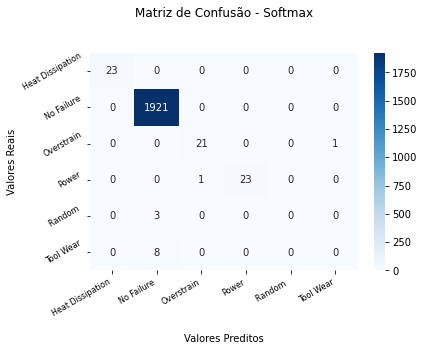

In [47]:
import seaborn as sns
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_val2, y_pred.argmax(axis=1))
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Matriz de Confusão - Softmax\n\n');
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Random ", "Tool Wear"], rotation=30, horizontalalignment='right', fontsize=8)
ax.yaxis.set_ticklabels(["Heat Dissipation", "No Failure", "Overstrain", "Power", "Random ", "Tool Wear"], rotation=30, horizontalalignment='right', fontsize=8)

## Display the visualization of the Confusion Matrix.
plt.show()


## E se tentarmos prever apenas se existe falha ou nao, independente do tipo de falha? Isoo aumentaria a taxa de acerto, e posteriormente, poderiamos tentar descobrir qual o tipo. Vamos fazer isso:

In [48]:
def auxiliar(x):
    if x == 'No Failure':
        return 0
    else:
        return 1

df_treino3['failure_type'] = df_treino2['failure_type'].apply(auxiliar)
df_treino3.failure_type.value_counts(dropna=False)

0    6435
1     232
Name: failure_type, dtype: int64

In [49]:
X = df_treino3.drop('failure_type',axis=1)
y = df_treino3.failure_type
X_tr, X_val, y_tr, y_val = train_test_split(X,y,test_size=.3, random_state=5487)

cnb2 = CategoricalNB(alpha=0.001)
cnb2.fit(X_tr,y_tr)



CategoricalNB(alpha=0.001)

In [50]:
y_pred = cnb2.predict(X_val)
np.unique(y_pred)

array([0, 1], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, y_pred,normalize=True)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
print('Acuracia: ',acc)
print('Precisao: ',precision)
print('Recall: ',recall)

Acuracia:  0.9860069965017492
Precisao:  0.9754590525156077
Recall:  0.8369794377928162


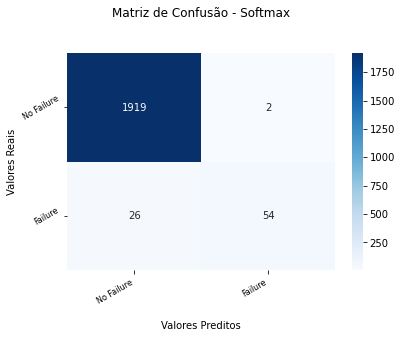

In [53]:
import seaborn as sns
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_val, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Matriz de Confusão - Softmax\n\n');
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["No Failure","Failure"], rotation=30, horizontalalignment='right', fontsize=8)
ax.yaxis.set_ticklabels(["No Failure","Failure"], rotation=30, horizontalalignment='right', fontsize=8)

## Display the visualization of the Confusion Matrix.
plt.show()

Parece que o modelo piorou, pois quando foi feita a previsao multiclasse, tivemos mais maquinas que falham identificadas do que agora. Esse dado é facilmente constatado, contando os verdadeiros positivos de cada classe na matriz de confusão multiclasse, e comparando com a matriz de confusão acima.



## Testando outros modelos:

### Arvore de decisão

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

params = {
    'max_leaf_nodes': [4,8,16,32,64,128,256,512,1024,2048],
    'criterion': ['gini','entropy'],
}
scoring = {"AUC": "roc_auc", "Recall": make_scorer(recall_score)}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=61658), #Primeiro arg: Modelo
    params,                                     #Segundo arg: Parâmetros
    cv=5,                                       #Arg `cv`: Qtd de folds
    scoring = scoring,                          #Arg `scoring`: Métrica
    refit="Recall",
    return_train_score=True,
    verbose=5, #Arg `verbose`: Mostra na tela
)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             refit='Recall', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Recall': make_scorer(recall_score)},
             verbose=5)

In [55]:
grid.fit(X_tr,y_tr);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_leaf_nodes=4; AUC: (train=0.871, test=0.955) Recall: (train=0.438, test=0.581) total time=   0.0s
[CV 2/5] END criterion=gini, max_leaf_nodes=4; AUC: (train=0.890, test=0.880) Recall: (train=0.488, test=0.387) total time=   0.0s
[CV 3/5] END criterion=gini, max_leaf_nodes=4; AUC: (train=0.894, test=0.867) Recall: (train=0.492, test=0.367) total time=   0.0s
[CV 4/5] END criterion=gini, max_leaf_nodes=4; AUC: (train=0.897, test=0.854) Recall: (train=0.451, test=0.533) total time=   0.0s
[CV 5/5] END criterion=gini, max_leaf_nodes=4; AUC: (train=0.890, test=0.883) Recall: (train=0.467, test=0.467) total time=   0.0s
[CV 1/5] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.947, test=0.982) Recall: (train=0.769, test=0.935) total time=   0.0s
[CV 2/5] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.957, test=0.965) Recall: (train=0.802, test=0.774) total time=   0.0s
[CV 3/5] END criterio

[CV 2/5] END criterion=entropy, max_leaf_nodes=32; AUC: (train=0.996, test=0.944) Recall: (train=0.835, test=0.774) total time=   0.0s
[CV 3/5] END criterion=entropy, max_leaf_nodes=32; AUC: (train=0.997, test=0.829) Recall: (train=0.852, test=0.700) total time=   0.0s
[CV 4/5] END criterion=entropy, max_leaf_nodes=32; AUC: (train=0.996, test=0.901) Recall: (train=0.861, test=0.733) total time=   0.0s
[CV 5/5] END criterion=entropy, max_leaf_nodes=32; AUC: (train=0.996, test=0.962) Recall: (train=0.836, test=0.800) total time=   0.0s
[CV 1/5] END criterion=entropy, max_leaf_nodes=64; AUC: (train=0.998, test=0.967) Recall: (train=0.826, test=0.935) total time=   0.0s
[CV 2/5] END criterion=entropy, max_leaf_nodes=64; AUC: (train=0.999, test=0.900) Recall: (train=0.860, test=0.774) total time=   0.0s
[CV 3/5] END criterion=entropy, max_leaf_nodes=64; AUC: (train=0.999, test=0.845) Recall: (train=0.861, test=0.700) total time=   0.0s
[CV 4/5] END criterion=entropy, max_leaf_nodes=64; AUC:

In [56]:
grid.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 8}

In [57]:
print('melhor recall nos dados de teste: ',grid.best_score_)

melhor recall nos dados de teste:  0.7886021505376343


In [58]:
y_pred = grid.predict(X_val)

In [61]:
acc = accuracy_score(y_val, y_pred,normalize=True)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print('Acuracia: ',acc)
print('Precisao: ',precision)
print('Recall: ',recall)


Acuracia:  0.9940029985007496
Precisao:  1.0
Recall:  0.85


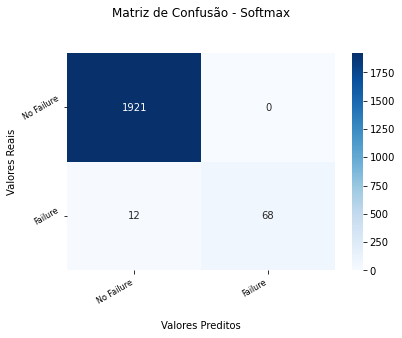

In [60]:
import seaborn as sns
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_val, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Matriz de Confusão - Softmax\n\n');
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["No Failure","Failure"], rotation=30, horizontalalignment='right', fontsize=8)
ax.yaxis.set_ticklabels(["No Failure","Failure"], rotation=30, horizontalalignment='right', fontsize=8)

## Display the visualization of the Confusion Matrix.
plt.show()

Este resultado é bem melhor do que o ultimo. Foram identificadas 68 maquinas corretamente, enquanto que no Naive Bayes,
apenas 54. Alem do mais, a precisão aqui é 100%. Temos ainda 12 maquinas que não foram encontradas.

# escolha do melhor modelo

Como nos testes dos modelos, o que apresentou melhores resultados foi a arvore de decisão, logo este é o modelo escolhido para realisar as previsoes.

# Previsões

## treinar o modelo escolhido com todos os dados

324.0


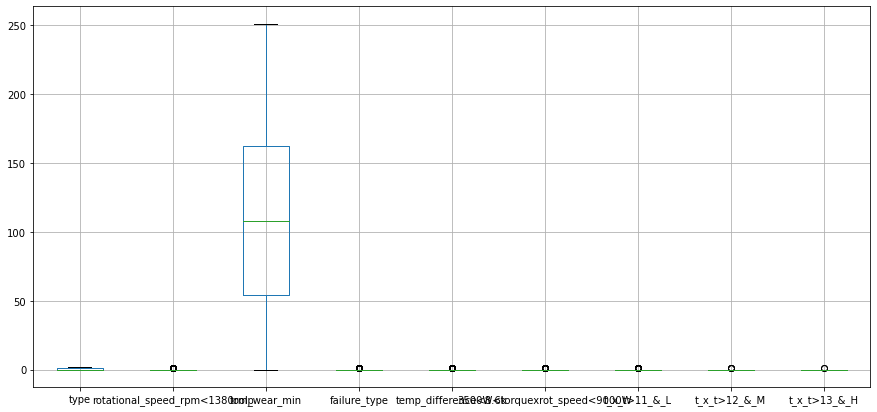

In [689]:
q3 = df_treino3['tool_wear_min'].quantile(0.75)
q1 = df_treino3['tool_wear_min'].quantile(0.25) 
iqr = q3 - q1
teto = q3+(1.5*iqr)
piso = q1-(1.5*iqr)
print(teto)
df_treino3.loc[df_treino3['tool_wear_min'] > teto, 'tool_wear_min'] = teto

df_treino3.loc[df_treino3['tool_wear_min'] < piso, 'tool_wear_min'] = piso

df_treino3.boxplot(figsize=(15,7))
plt.show()


In [690]:
#simples padronização:
q3 = df_treino3['tool_wear_min'].quantile(0.75)

def auxiliar(x):
    return x/q3
   

df_treino3['tool_wear_min'] = df_treino3['tool_wear_min'].apply(auxiliar)



In [691]:
params = {
    'max_leaf_nodes': [8],
    'criterion': ['gini','entropy'],
}
scoring = {"AUC": "roc_auc", "Recall": make_scorer(recall_score)}


grid = GridSearchCV(
    DecisionTreeClassifier(random_state=61658), #Primeiro arg: Modelo
    params,                                     #Segundo arg: Parâmetros
    cv=10,                                      #Arg `cv`: Qtd de folds
    scoring=scoring ,                            #`scoring`: Métrica
    refit="Recall",                             
    return_train_score=True,#Arg 
    verbose=5, #Arg `verbose`: Mostra na tela
)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [8]},
             refit='Recall', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Recall': make_scorer(recall_score)},
             verbose=5)

In [692]:
X = df_treino3.drop('failure_type',axis=1)
y = df_treino3.failure_type
grid.fit(X,y)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.958, test=0.976) Recall: (train=0.809, test=0.913) total time=   0.0s
[CV 2/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.966, test=0.908) Recall: (train=0.828, test=0.739) total time=   0.0s
[CV 3/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.950, test=0.886) Recall: (train=0.837, test=0.652) total time=   0.0s
[CV 4/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.956, test=0.957) Recall: (train=0.804, test=0.957) total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.958, test=0.960) Recall: (train=0.809, test=0.957) total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.955, test=1.000) Recall: (train=0.798, test=1.000) total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=8; AUC: (train=0.962, test=0.975) Recall: (train=0.817, test=0.833) total time=   0.0s
[CV 8/10] END c

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [8]},
             refit='Recall', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Recall': make_scorer(recall_score)},
             verbose=5)

In [693]:
grid.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 8}

## Preparar a base de dados para a previsao

In [694]:
df_teste = pd.read_csv('desafio_manutencao_preditiva_teste.csv', sep=',')
df_teste

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,446,L47625,L,297.5,308.6,1793,26.7,70
1,7076,L54255,L,300.7,310.5,1536,47.4,192
2,1191,L48370,L,297.2,308.4,1460,42.1,41
3,2618,L49797,L,299.4,309.1,1670,35.9,68
4,5067,L52246,L,304.1,313.1,1550,30.9,9
...,...,...,...,...,...,...,...,...
3328,5554,L52733,L,302.5,311.9,1306,59.7,172
3329,6961,L54140,L,300.7,311.0,1413,52.0,91
3330,6914,L54093,L,300.8,311.2,1481,38.5,181
3331,5510,L52689,L,302.8,312.2,1509,36.5,52


In [695]:
df_teste = df_teste.set_index('udi')

df_teste2 = df_teste.copy()
df_teste2.loc[:,'temp_difference<8.6k'] = abs(df_teste2.air_temperature_k - df_teste2.process_temperature_k)
df_teste2 = df_teste2.drop(['air_temperature_k','process_temperature_k'],axis=1)


def auxiliar(x):
    if x<8.6:
        return 1
    else:
        return 0

df_teste2['temp_difference<8.6k'] = df_teste2['temp_difference<8.6k'].apply(auxiliar)
df_teste2


,product_id,type,rotational_speed_rpm,torque_nm,tool_wear_min,temp_difference<8.6k
udi,,,,,,
446,L47625,L,1793,26.7,70,0
7076,L54255,L,1536,47.4,192,0
1191,L48370,L,1460,42.1,41,0
2618,L49797,L,1670,35.9,68,0
5067,L52246,L,1550,30.9,9,0
...,...,...,...,...,...,...
5554,L52733,L,1306,59.7,172,0
6961,L54140,L,1413,52.0,91,0
6914,L54093,L,1481,38.5,181,0


In [696]:
def auxiliar(x):
    if x<1380:
        return 1
    else:
        return 0

df_teste2['rotational_speed_rpm'] = df_teste2['rotational_speed_rpm'].apply(auxiliar)
df_teste2 = df_teste2.rename(columns={"rotational_speed_rpm":"rotational_speed_rpm<1380rmp"})
df_teste2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,temp_difference<8.6k
udi,,,,,,
446,L47625,L,0,26.7,70,0
7076,L54255,L,0,47.4,192,0
1191,L48370,L,0,42.1,41,0
2618,L49797,L,0,35.9,68,0
5067,L52246,L,0,30.9,9,0
...,...,...,...,...,...,...
5554,L52733,L,1,59.7,172,0
6961,L54140,L,0,52.0,91,0
6914,L54093,L,0,38.5,181,0


In [697]:
df_teste2.loc[:,'3500W<torquexrot_speed<9000W'] = (df_teste.torque_nm * df_teste.rotational_speed_rpm *0.10471975511965977) 

def auxiliar(x):
    if (x<3500 or x>9000):
        return 1
    else:
        return 0

df_teste2['3500W<torquexrot_speed<9000W'] = df_teste2['3500W<torquexrot_speed<9000W'].apply(auxiliar)
df_teste2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,temp_difference<8.6k,3500W<torquexrot_speed<9000W
udi,,,,,,,
446,L47625,L,0,26.7,70,0,0
7076,L54255,L,0,47.4,192,0,0
1191,L48370,L,0,42.1,41,0,0
2618,L49797,L,0,35.9,68,0,0
5067,L52246,L,0,30.9,9,0,0
...,...,...,...,...,...,...,...
5554,L52733,L,1,59.7,172,0,0
6961,L54140,L,0,52.0,91,0,0
6914,L54093,L,0,38.5,181,0,0


In [698]:
df_teste2.loc[:,'torque_nm_x_tool_wear_min'] = (df_teste.torque_nm * df_teste.tool_wear_min)
df_teste2

,product_id,type,rotational_speed_rpm<1380rmp,torque_nm,tool_wear_min,temp_difference<8.6k,3500W<torquexrot_speed<9000W,torque_nm_x_tool_wear_min
udi,,,,,,,,
446,L47625,L,0,26.7,70,0,0,1869.0
7076,L54255,L,0,47.4,192,0,0,9100.8
1191,L48370,L,0,42.1,41,0,0,1726.1
2618,L49797,L,0,35.9,68,0,0,2441.2
5067,L52246,L,0,30.9,9,0,0,278.1
...,...,...,...,...,...,...,...,...
5554,L52733,L,1,59.7,172,0,0,10268.4
6961,L54140,L,0,52.0,91,0,0,4732.0
6914,L54093,L,0,38.5,181,0,0,6968.5


In [699]:
df_teste2.loc[(df_teste2.type == 'L') & (df_teste2.torque_nm_x_tool_wear_min > 11000),'t_x_t>11_&_L'] = 1 
df_teste2.loc[(df_teste2.type == 'M') & (df_teste2.torque_nm_x_tool_wear_min > 12000),'t_x_t>12_&_M'] = 1 
df_teste2.loc[(df_teste2.type == 'H') & (df_teste2.torque_nm_x_tool_wear_min > 13000),'t_x_t>13_&_H'] = 1 

df_teste2['t_x_t>11_&_L'].fillna(0, inplace=True);
df_teste2['t_x_t>12_&_M'].fillna(0, inplace=True);
df_teste2['t_x_t>13_&_H'].fillna(0, inplace=True);

df_teste2 = df_teste2.drop(['torque_nm_x_tool_wear_min'],axis=1)

In [700]:
df_teste2 = df_teste2.drop('product_id',axis=1)

df_teste3 = df_teste2.drop('torque_nm', axis=1)

def auxiliar(x):
    if x == 'L':
        return 0
    elif x == 'M':
        return 1
    elif x == 'H':
        return 2
df_teste3['type'] = df_teste2['type'].apply(auxiliar)
df_teste3

,type,rotational_speed_rpm<1380rmp,tool_wear_min,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
udi,,,,,,,,
446,0,0,70,0,0,0.0,0.0,0.0
7076,0,0,192,0,0,0.0,0.0,0.0
1191,0,0,41,0,0,0.0,0.0,0.0
2618,0,0,68,0,0,0.0,0.0,0.0
5067,0,0,9,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5554,0,1,172,0,0,0.0,0.0,0.0
6961,0,0,91,0,0,0.0,0.0,0.0
6914,0,0,181,0,0,0.0,0.0,0.0


In [701]:
q3 = df_teste3['tool_wear_min'].quantile(0.75)
q1 = df_teste3['tool_wear_min'].quantile(0.25) 
iqr = q3 - q1
teto = q3+(1.5*iqr)
piso = q1-(1.5*iqr)
df_teste3.loc[df_teste3['tool_wear_min'] > teto, 'tool_wear_min'] = teto
df_teste3.loc[df_teste3['tool_wear_min'] < piso, 'tool_wear_min'] = piso

In [702]:
#simples padronização:
q3 = df_teste3['tool_wear_min'].quantile(0.75)

def auxiliar(x):
    return x/q3
   

df_teste3['tool_wear_min'] = df_teste3['tool_wear_min'].apply(auxiliar)
df_teste3.describe()

,type,rotational_speed_rpm<1380rmp,tool_wear_min,temp_difference<8.6k,3500W<torquexrot_speed<9000W,t_x_t>11_&_L,t_x_t>12_&_M,t_x_t>13_&_H
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.0
mean,0.510051,0.131113,0.660471,0.072007,0.009601,0.008401,0.001500,0.0
std,0.676060,0.337575,0.394155,0.258539,0.097528,0.091284,0.038709,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.312883,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.662577,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2.000000,1.000000,1.552147,1.000000,1.000000,1.000000,1.000000,0.0


## Gerar previsoes 

In [703]:
y_pred = grid.predict(df_teste3)

In [704]:
np.unique(y_pred), y_pred.shape, df_teste3.index.shape

(array([0, 1], dtype=int64), (3333,), (3333,))

In [705]:
identificador = df_teste3.index.to_numpy()
identificador

array([ 446, 7076, 1191, ..., 6914, 5510, 3066], dtype=int64)

In [706]:
df_final = pd.DataFrame(identificador, columns = ['udi'])
df_final['predictedValues'] = y_pred
df_final.index.name = 'rowNumber'

df_final

,udi,predictedValues
rowNumber,,
0,446,0
1,7076,0
2,1191,0
3,2618,0
4,5067,0
...,...,...
3328,5554,0
3329,6961,0
3330,6914,0


In [710]:
compression_opts = dict(method='zip',
                        archive_name='predicted.csv')  
df_final.to_csv('predicted.zip', index=True,
          compression=compression_opts) 